# **Importing Libraries**

In [1051]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.inspection import permutation_importance
from category_encoders import TargetEncoder, CountEncoder
from sklearn.decomposition import PCA, KernelPCA, FastICA
from sklearn.cluster import KMeans

from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, StackingClassifier, VotingClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
import shap


# **Preparing Dataset**

In [1052]:
train_df = pd.read_csv('training_dataset.csv')
test_df = pd.read_csv('validation_set.csv')

In [1053]:
train_set, val_set = train_test_split(
    train_df, test_size = 0.2,
    random_state = 43,
    stratify = train_df['berlangganan_deposito'])

# **Data Cleaning**

In [1054]:
def apply_cleaning(df: pd.DataFrame) -> pd.DataFrame:
    ret = df.copy()
    # ret['hari_sejak_kontak_sebelumnya'] = ret['hari_sejak_kontak_sebelumnya'].replace(999, -10)
    return ret

## Handling Imbalanced Data

In [1055]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours, TomekLinks

from imblearn.over_sampling import SMOTE, ADASYN, SMOTEN, SMOTENC, BorderlineSMOTE
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.over_sampling import RandomOverSampler
import sdv
from ctgan import CTGAN
from collections import Counter

# smoteenn = SMOTEENN(
#     smote=SMOTE(
#         sampling_strategy=0.5,  # Boost minority to 50% of majority (now 700→3150)
#         k_neighbors=5,          # Default (safe for medium-sized datasets)
#         random_state=42
#     ),
#     enn=EditedNearestNeighbours(
#         sampling_strategy='majority',  # Aggressively clean majority class
#         n_neighbors=3,                # Strict noise removal
#         kind_sel='mode'               # Remove points misclassified by all neighbors
#     ),
#     random_state=42)
    
def apply_oversample(df: pd.DataFrame) -> pd.DataFrame:
    target_column = "berlangganan_deposito"
    ret = df.copy()
    # minority_class = ret[ret[target_column] == 1]
    # majority_class = ret[ret[target_column] == 0]
    X = ret.drop(columns=[target_column])
    y = ret[target_column]
    smote = TomekLinks(
        sampling_strategy='majority')

    X_resampled, y_resampled = smote.fit_resample(X, y)
    resampled_ret = pd.DataFrame(X_resampled, columns=X.columns)
    resampled_ret[target_column] = y_resampled
    
    return resampled_ret


# **Data Preprocessing**

## Feature Encoding

In [1056]:
encoder1 = TargetEncoder()
encoder2 = TargetEncoder()
encoder3 = TargetEncoder()
encoder4 = TargetEncoder()
encoder5 = TargetEncoder()
encoder6 = TargetEncoder()
encoder7 = TargetEncoder()
encoder8 = TargetEncoder()
encoder9 = TargetEncoder()
encoder10 = TargetEncoder()
encoder11 = TargetEncoder()
encoder12 = TargetEncoder()
encoder13 = TargetEncoder()
encoder14 = TargetEncoder()

def apply_target_encoding(df, train=True):
    ret = df.copy()
    target_col = "berlangganan_deposito"
    if train:
        ret['pekerjaan'] = encoder1.fit_transform(ret['pekerjaan'], ret[target_col])
        ret['status_perkawinan'] = encoder2.fit_transform(ret['status_perkawinan'], ret[target_col])
        ret['pendidikan'] = encoder3.fit_transform(ret['pendidikan'], ret[target_col])
        ret['gagal_bayar_sebelumnya'] = encoder4.fit_transform(ret['gagal_bayar_sebelumnya'], ret[target_col])
        ret['pinjaman_rumah'] = encoder5.fit_transform(ret['pinjaman_rumah'], ret[target_col])
        ret['pinjaman_pribadi'] = encoder6.fit_transform(ret['pinjaman_pribadi'], ret[target_col])
        ret['jenis_kontak'] = encoder7.fit_transform(ret['jenis_kontak'], ret[target_col])
        ret['bulan_kontak_terakhir'] = encoder8.fit_transform(ret['bulan_kontak_terakhir'], ret[target_col])
        ret['hari_kontak_terakhir'] = encoder9.fit_transform(ret['hari_kontak_terakhir'], ret[target_col])
        ret['hasil_kampanye_sebelumnya'] = encoder10.fit_transform(ret['hasil_kampanye_sebelumnya'], ret[target_col])
        ret['pulau'] = encoder11.fit_transform(ret['pulau'], ret[target_col])
        ret['kelompok_usia'] = encoder12.fit_transform(ret['kelompok_usia'], ret[target_col])
    else:
        ret['pekerjaan'] = encoder1.transform(ret['pekerjaan'])
        ret['status_perkawinan'] = encoder2.transform(ret['status_perkawinan'])
        ret['pendidikan'] = encoder3.transform(ret['pendidikan'])
        ret['gagal_bayar_sebelumnya'] = encoder4.transform(ret['gagal_bayar_sebelumnya'])
        ret['pinjaman_rumah'] = encoder5.transform(ret['pinjaman_rumah'])
        ret['pinjaman_pribadi'] = encoder6.transform(ret['pinjaman_pribadi'])
        ret['jenis_kontak'] = encoder7.transform(ret['jenis_kontak'])
        ret['bulan_kontak_terakhir'] = encoder8.transform(ret['bulan_kontak_terakhir'])
        ret['hari_kontak_terakhir'] = encoder9.transform(ret['hari_kontak_terakhir'])
        ret['hasil_kampanye_sebelumnya'] = encoder10.transform(ret['hasil_kampanye_sebelumnya'])
        ret['pulau'] = encoder11.transform(ret['pulau'])
        ret['kelompok_usia'] = encoder12.transform(ret['kelompok_usia'])
    return ret

In [1057]:
encoder1 = CountEncoder()
encoder2 = CountEncoder()
encoder3 = CountEncoder()
encoder4 = CountEncoder()
encoder5 = CountEncoder()
encoder6 = CountEncoder()
encoder7 = CountEncoder()
encoder8 = CountEncoder()
encoder9 = CountEncoder()
encoder10 = CountEncoder()
encoder11 = CountEncoder()
encoder12 = CountEncoder()
encoder13 = CountEncoder()
encoder14 = CountEncoder()

def apply_count_encoding(df, train=True):
    ret = df.copy()
    if train:
        ret['pekerjaan'] = encoder1.fit_transform(ret['pekerjaan'])
        ret['status_perkawinan'] = encoder2.fit_transform(ret['status_perkawinan'])
        ret['pendidikan'] = encoder3.fit_transform(ret['pendidikan'])
        ret['gagal_bayar_sebelumnya'] = encoder4.fit_transform(ret['gagal_bayar_sebelumnya'])
        ret['pinjaman_rumah'] = encoder5.fit_transform(ret['pinjaman_rumah'])
        ret['pinjaman_pribadi'] = encoder6.fit_transform(ret['pinjaman_pribadi'])
        ret['jenis_kontak'] = encoder7.fit_transform(ret['jenis_kontak'])
        ret['bulan_kontak_terakhir'] = encoder8.fit_transform(ret['bulan_kontak_terakhir'])
        ret['hari_kontak_terakhir'] = encoder9.fit_transform(ret['hari_kontak_terakhir'])
        # ret['hasil_kampanye_sebelumnya'] = encoder10.fit_transform(ret['hasil_kampanye_sebelumnya'])
        ret['pulau'] = encoder11.fit_transform(ret['pulau'])
        ret['kelompok_usia'] = encoder12.fit_transform(ret['kelompok_usia'])
    else:
        ret['pekerjaan'] = encoder1.transform(ret['pekerjaan'])
        ret['status_perkawinan'] = encoder2.transform(ret['status_perkawinan'])
        ret['pendidikan'] = encoder3.transform(ret['pendidikan'])
        ret['gagal_bayar_sebelumnya'] = encoder4.transform(ret['gagal_bayar_sebelumnya'])
        ret['pinjaman_rumah'] = encoder5.transform(ret['pinjaman_rumah'])
        ret['pinjaman_pribadi'] = encoder6.transform(ret['pinjaman_pribadi'])
        ret['jenis_kontak'] = encoder7.transform(ret['jenis_kontak'])
        ret['bulan_kontak_terakhir'] = encoder8.transform(ret['bulan_kontak_terakhir'])
        ret['hari_kontak_terakhir'] = encoder9.transform(ret['hari_kontak_terakhir'])
        # ret['hasil_kampanye_sebelumnya'] = encoder10.transform(ret['hasil_kampanye_sebelumnya'])
        ret['pulau'] = encoder11.transform(ret['pulau'])
        ret['kelompok_usia'] = encoder12.transform(ret['kelompok_usia'])
    return ret

## Feature Scaling

In [1058]:
scaler = StandardScaler()
def apply_scale(df: pd.DataFrame, train:bool = False) -> pd.DataFrame:
  cols = [col for col in df.columns if col != "berlangganan_deposito"]
  ret = df.copy()
  if train:
    ret[cols] = scaler.fit_transform(df[cols])
  else:
    ret[cols] = scaler.transform(df[cols])
  return ret

## Feature Engineering

In [1059]:
def apply_fe(df: pd.DataFrame) -> pd.DataFrame:
    ret = df.copy()
    
    # ret['value_1'] = ret['jumlah_kontak_sebelumnya']/ret['hasil_kampanye_sebelumnya']
    # ret['suku_bunga_pekerja_rasio'] = ret['suku_bunga_euribor_3bln'] * (ret['jumlah_pekerja'])
    # ret['bulan_sin'] = np.sin(2 * np.pi * ret['bulan_kontak_terakhir'] / 12)
    # ret['bulan_cos'] = np.cos(2 * np.pi * ret['bulan_kontak_terakhir'] / 12)
    # ret['bulan_tan'] = np.tan(2 * np.pi * ret['bulan_kontak_terakhir'] / 12)
    # ret['total_kontak'] = ret['jumlah_kontak_sebelumnya'] + ret['jumlah_kontak_kampanye_ini']
    # ret['frekuensi_kontak'] = ret['jumlah_kontak_sebelumnya'] / (ret['hari_sejak_kontak_sebelumnya'] + 1e-6)
    # ret['belum_pernah_kontak'] = (ret['hari_sejak_kontak_sebelumnya'] == 999).astype(int)
    # ret['hari_sejak_kontak_sebelumnya'] = ret['hari_sejak_kontak_sebelumnya'].replace(999, np.nan)
    ret['volatilitas'] = ret['tingkat_variasi_pekerjaan'] * ret['indeks_harga_konsumen']
    # ret['risiko_pinjaman'] = ret['gagal_bayar_sebelumnya'] * (ret['pinjaman_rumah'] + ret['pinjaman_pribadi'])
    # interaksi_kontak_berhasil = hasil_kampanye_sebelumnya / (jumlah_kontak_kampanye_ini + 1)
    # ret['interaksi_kontak_berhasil'] = ret['sukses_sebelumnya'] / (ret['jumlah_kontak_kampanye_ini'] + 1e-6)
    ret['interaksi_kontak_terakhir'] = ret['jumlah_kontak_kampanye_ini'] / (ret['hari_kontak_terakhir'] + 1) 
    # ret['positive_indicator'] = (ret['jumlah_kontak_kampanye_ini'] > 4).astype(int) + (ret['hasil_kampanye_sebelumnya'] == 'success').astype(int)
    ret['stability'] = 1 / (ret['volatilitas'] + 1e-6)
    # ret['recency_score'] = 1 / (ret['hari_sejak_kontak_sebelumnya'] + 1e-6)
    # ret['economic_confidence'] = (
    # ret['indeks_kepercayaan_konsumen'] * 0.7 + 
    # (1 / ret['suku_bunga_euribor_3bln']) * 0.3)
#     ret['job_security'] = (
#     ret['jumlah_pekerja'] * 
#     (1 - ret['tingkat_variasi_pekerjaan'])  # High employment + low volatility
# )
    ret['never_contacted'] = (ret['hari_sejak_kontak_sebelumnya'] == 999).astype(int)
    ret['hari_sejak_kontak_sebelumnya'] = ret['hari_sejak_kontak_sebelumnya'].replace(999, -50)
    # ret['contacted_3'] = (ret['hari_sejak_kontak_sebelumnya'] == 3).astype(int)
    # ret['contacted_6'] = (ret['hari_sejak_kontak_sebelumnya'] == 6).astype(int)
    min_val = ret['volatilitas'].min()
    shift = 0
    if min_val <= 0:
        shift = abs(min_val) + 1e-6  # small epsilon to avoid zero
    # ret['volatilitas_log'] = np.log1p(ret['volatilitas'] + shift)

    ret['stability_log'] = np.log1p(ret['stability'])
    ret['tingkat_variasi_pekerjaan_x_suku_bunga'] = ret['tingkat_variasi_pekerjaan'] * ret['suku_bunga_euribor_3bln']
    ret['indeks_harga_konsumen_x_suku_bunga'] = ret['indeks_harga_konsumen'] * ret['suku_bunga_euribor_3bln']
    ret['hari_kontak_sin'] = np.sin(2 * np.pi * ret['hari_kontak_terakhir'] / 7)
    ret['hari_kontak_cos'] = np.cos(2 * np.pi * ret['hari_kontak_terakhir'] / 7)
    # ret['risk_flag'] = ret['never_contacted'] * ret['gagal_bayar_sebelumnya']
    ret.drop(columns=['never_contacted', 'gagal_bayar_sebelumnya'], inplace=True)
    
    
    return ret

In [1060]:
def apply_high_pekerjaan(df: pd.DataFrame) -> pd.DataFrame:
    ret = df.copy()
    ret['high_pekerjaan'] = ret['pekerjaan'].apply(lambda x: 1 if x in ['mahasiswa', 'pensiunan'] else 0)
    return ret

In [1061]:
def apply_high_season(df: pd.DataFrame) -> pd.DataFrame:
    ret = df.copy()
    ret['high_season'] = ret['bulan_kontak_terakhir'].apply(lambda x: 1 if x in ['oct', 'mar', 'sep', 'apr', 'dec'] else 0)
    return ret

In [1062]:
ohe = OneHotEncoder(
    categories='auto',
    drop='first',  
    sparse_output=False,  
    handle_unknown='ignore'  
)
def apply_sukses(df, is_train):
    ret = df.copy()
    if is_train:
        encoded_fuel = ohe.fit_transform(ret[['hasil_kampanye_sebelumnya']])
    else:
        encoded_fuel = ohe.transform(ret[['hasil_kampanye_sebelumnya']])
    
    features = ohe.get_feature_names_out(['hasil_kampanye_sebelumnya'])
    encoded_df = pd.DataFrame(encoded_fuel, columns=features, index=ret.index)
    
    ret = pd.concat([ret, encoded_df], axis=1)
    ret = ret.drop(columns=['hasil_kampanye_sebelumnya'])
    return ret


In [1063]:
def apply_usia (df : pd.DataFrame) -> pd.DataFrame:
    ret = df.copy()
    bins = [0, 25, 40, 60, 100]
    labels = ['Gen-Z', 'Millenial', 'Gen-X', 'Boomer']
    ret['kelompok_usia'] = pd.cut(ret['usia'], bins=bins, labels=labels)
    return ret

## Dimentionality Reduction

In [1064]:
pca = PCA(n_components=1)
def apply_pca(df: pd.DataFrame, train: bool = False) -> pd.DataFrame:
    ret = df.copy()
    cols = ['tingkat_variasi_pekerjaan', 'suku_bunga_euribor_3bln', 'jumlah_pekerja']
    if train:
        pca_result = pca.fit_transform(ret[cols])
        pca_cols = ['pca_1']

        # ret = ret.drop(columns=cols)
        ret[pca_cols] = pca_result
    else:
        pca_result = pca.transform(ret[cols])
        pca_cols = ['pca_1']
        # ret = ret.drop(columns=cols)
        ret[pca_cols] = pca_result
    return ret

In [1065]:
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=1)  

def apply_kpca(df: pd.DataFrame, train: bool = False) -> pd.DataFrame:
    ret = df.copy()
    cols = ['tingkat_variasi_pekerjaan', 'suku_bunga_euribor_3bln', 'jumlah_pekerja']
    if train:
        kpca_result = kpca.fit_transform(ret[cols])
        kpca_cols = ['kpca_1', 'kpca_2']
        ret = ret.drop(columns=cols)
        ret[kpca_cols] = kpca_result
    else:
        kpca_result = kpca.transform(ret[cols])
        kpca_cols = ['kpca_1', 'kpca_2']
        ret = ret.drop(columns=cols)
        ret[kpca_cols] = kpca_result
    return ret


In [1066]:
ica = FastICA(n_components=2, random_state=42)

def apply_ica(df: pd.DataFrame, train: bool = False) -> pd.DataFrame:
    ret = df.copy()
    cols = ['tingkat_variasi_pekerjaan', 'suku_bunga_euribor_3bln', 'jumlah_pekerja']
    if train:
        ica_result = ica.fit_transform(ret[cols])
        ica_cols = ['ica_1', 'ica_2']
        # ret = ret.drop(columns=cols)
        ret[ica_cols] = ica_result
    else:
        ica_result = ica.transform(ret[cols])
        ica_cols = ['ica_1', 'ica_2']
        # ret = ret.drop(columns=cols)
        ret[ica_cols] = ica_result
    return ret


## Clustering

In [1067]:
kmeans = KMeans(n_clusters=4, random_state=42)
def apply_cluster(df: pd.DataFrame, train: bool = False) -> pd.DataFrame:
    ret = df.copy()
    cols = ['kpca_1', 'kpca_2']
    if train:
        ret['cluster'] = kmeans.fit_predict(ret[cols])
    else:
        ret['cluster'] = kmeans.predict(ret[cols])
    return ret

# **Preprocessing Pipeline**

In [1068]:
class CustomPipeline:
    def fit_transform(X: pd.DataFrame, y: pd.Series) -> tuple:
        ret = pd.concat([X, y], axis=1)
        ret = apply_cleaning(ret)
        # ret = apply_high_pekerjaan(ret)
        ret = apply_high_season(ret)
        ret = apply_usia(ret)
        ret = apply_sukses(ret, True)
        # ret = apply_target_encoding(ret, True)
        ret = apply_count_encoding(ret, True)
        ret = apply_fe(ret)
        ret = ret.drop(columns=['customer_number', 'usia', 'status_perkawinan', 'pendidikan',
       'pinjaman_rumah', 'pinjaman_pribadi', 'hari_kontak_terakhir',
        'jumlah_kontak_sebelumnya',
       'indeks_kepercayaan_konsumen', 'pulau', 'indeks_harga_konsumen', 'bulan_kontak_terakhir', 
       'jumlah_kontak_kampanye_ini', 'pekerjaan'])
        ret = apply_scale(ret, True)
        # ret = apply_ica(ret, True)
        ret = apply_kpca(ret, True)
        # ret = apply_cluster(ret, train=True)
        # ret = apply_oversample(ret)

        return (ret.drop(columns=["berlangganan_deposito"]), ret["berlangganan_deposito"])

    def transform(df: pd.DataFrame) -> pd.DataFrame:
        ret = df.copy()
        ret = apply_cleaning(ret)
        # ret = apply_high_pekerjaan(ret)
        ret = apply_high_season(ret)
        ret = apply_usia(ret)
        ret = apply_sukses(ret, False)
        # ret = apply_target_encoding(ret, False)
        ret = apply_count_encoding(ret, False)
        ret = apply_fe(ret)
        ret = ret.drop(columns=['customer_number', 'usia', 'status_perkawinan', 'pendidikan',
       'pinjaman_rumah', 'pinjaman_pribadi', 'hari_kontak_terakhir', 'jumlah_kontak_sebelumnya',
         'indeks_kepercayaan_konsumen', 'pulau', 'indeks_harga_konsumen', 'bulan_kontak_terakhir'
         , 'jumlah_kontak_kampanye_ini', 'pekerjaan'])
        ret = apply_scale(ret, False)
        # ret = apply_ica(ret, False)
        ret = apply_kpca(ret, False)
        # ret = apply_cluster(ret, train=False)
        return ret

In [1069]:
# coba, cobaa = CustomPipeline.fit_transform(train_set.drop(columns=['berlangganan_deposito']), train_set['berlangganan_deposito'])
# coba['berlangganan_deposito'] = cobaa
# corr_matrix = coba.corr(method='spearman')
# plt.figure(figsize=(20, 20))
# sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
# plt.title('Correlation Matrix')
# plt.show()

'customer_number', 'usia', 'status_perkawinan', 'pendidikan',
       'pinjaman_rumah', 'pinjaman_pribadi', 'hari_kontak_terakhir',
        'jumlah_kontak_sebelumnya',
       'indeks_kepercayaan_konsumen', 'pulau'

# **Modeling & Validation**

In [1070]:


def run_kfold_cv(model, df, n_splits=5, random_state=42):
    kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    
    metrics = {
        'roc_auc': [],
    }
    for fold, (train_idx, val_idx) in enumerate(kf.split(df, df['berlangganan_deposito']), 1):
        train_df, val_df = df.iloc[train_idx], df.iloc[val_idx]
        y_train, y_val = train_df['berlangganan_deposito'], val_df['berlangganan_deposito']
        
        
        X_train = train_df.drop(columns=['berlangganan_deposito'])
        X_val = val_df.drop(columns=['berlangganan_deposito'])

        X_train_transformed, y_train = CustomPipeline.fit_transform(X_train, y_train)
        X_val_transformed = CustomPipeline.transform(X_val)

        model.fit(X_train_transformed, y_train)

        y_val_pred = model.predict_proba(X_val_transformed)[:, 1]

        roc_auc = roc_auc_score(y_val, y_val_pred)
        metrics['roc_auc'].append(roc_auc)

        print(f"Fold {fold} ROC AUC: {roc_auc:.4f}")

    avg_roc_auc = np.mean(metrics['roc_auc'])
    std_roc_auc = np.std(metrics['roc_auc'])
    

    print("\n=== ROC AUC Scores Across Folds ===")
    print([f"{score:.4f}" for score in metrics['roc_auc']])
    print(f"Average ROC AUC: {avg_roc_auc:.4f} ± {std_roc_auc:.4f}")



# model = RandomForestClassifier(random_state=42)
model = GradientBoostingClassifier( n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    min_samples_leaf=5,
    max_features='sqrt',
    validation_fraction=0.1,
    n_iter_no_change=10,
    random_state=42)
# model = LGBMClassifier()
# model = XGBClassifier()
# model = CatBoostClassifier()
# model = AdaBoostClassifier()
# model = LogisticRegression()
# model = DecisionTreeClassifier()
# model = KNeighborsClassifier()
# model = StackingClassifier(estimators=[
#     ('rf', RandomForestClassifier(random_state=42, class_weight='balanced')),
#     ('gb', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)),
#     ('xgb', XGBClassifier()),
#     ('cat', CatBoostClassifier()),
#     ('lgbm', LGBMClassifier()),
#     ('ada', AdaBoostClassifier()),
#     ('logreg', LogisticRegression()),
#     ('dt', DecisionTreeClassifier())
# ], final_estimator=LogisticRegression(), cv=5, n_jobs=-1)
# model = VotingClassifier(estimators=[
# model = SVC(probability=True, random_state=42)
# model = BalancedRandomForestClassifier(random_state=42, class_weight='balanced')
run_kfold_cv(model, train_df, n_splits=5, random_state=42)

Fold 1 ROC AUC: 0.7880
Fold 2 ROC AUC: 0.8059
Fold 3 ROC AUC: 0.8159
Fold 4 ROC AUC: 0.8013
Fold 5 ROC AUC: 0.7983

=== ROC AUC Scores Across Folds ===
['0.7880', '0.8059', '0.8159', '0.8013', '0.7983']
Average ROC AUC: 0.8019 ± 0.0091


=== ROC AUC Scores Across Folds ===
['0.7880', '0.8059', '0.8159', '0.8013', '0.7983']
Average ROC AUC: 0.8019 ± 0.0091

=== ROC AUC Scores Across Folds ===
['0.7852', '0.8064', '0.8140', '0.8010', '0.7977']
Average ROC AUC: 0.8009 ± 0.0096

Validation ROC AUC: 0.8044
Validation F1 Score: 0.3041
Validation Precision: 0.6460
Validation Recall: 0.1989


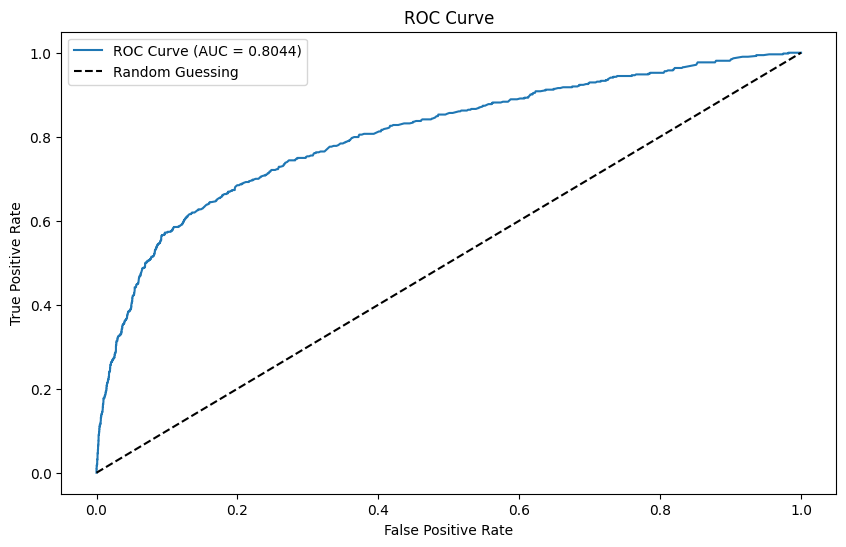

In [1071]:
X_train = train_set.drop(columns=["berlangganan_deposito"])
y_train = train_set["berlangganan_deposito"]

(X_train, y_train) = CustomPipeline.fit_transform(X_train, y_train)
X_val = val_set.drop(columns=["berlangganan_deposito"])
y_val = val_set["berlangganan_deposito"]

X_val = CustomPipeline.transform(X_val)

model.fit(X_train, y_train)
y_val_pred = model.predict_proba(X_val)[:, 1]
roc_auc = roc_auc_score(y_val, y_val_pred)
print(f"Validation ROC AUC: {roc_auc:.4f}")
# f1 score, precision, recall, confusion matrix
print(f"Validation F1 Score: {f1_score(y_val, (y_val_pred > 0.5).astype(int)):.4f}")
print(f"Validation Precision: {precision_score(y_val, (y_val_pred > 0.5).astype(int)):.4f}")
print(f"Validation Recall: {recall_score(y_val, (y_val_pred > 0.5).astype(int)):.4f}")
#pr auc
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [1072]:
hasil = pd.DataFrame({
    'customer_number': val_set['customer_number'],
    'berlangganan_deposito': y_val_pred
})

hasil['berlangganan_deposito'].describe()

count    4584.000000
mean        0.115959
std         0.144675
min         0.025014
25%         0.044461
50%         0.056969
75%         0.100130
max         0.869948
Name: berlangganan_deposito, dtype: float64

In [918]:
hasil = pd.DataFrame(y_val_pred, columns=['berlangganan_deposito'])
hasil['actual'] = y_val.values
hasil.to_csv('hasil_validation.csv', index=False)

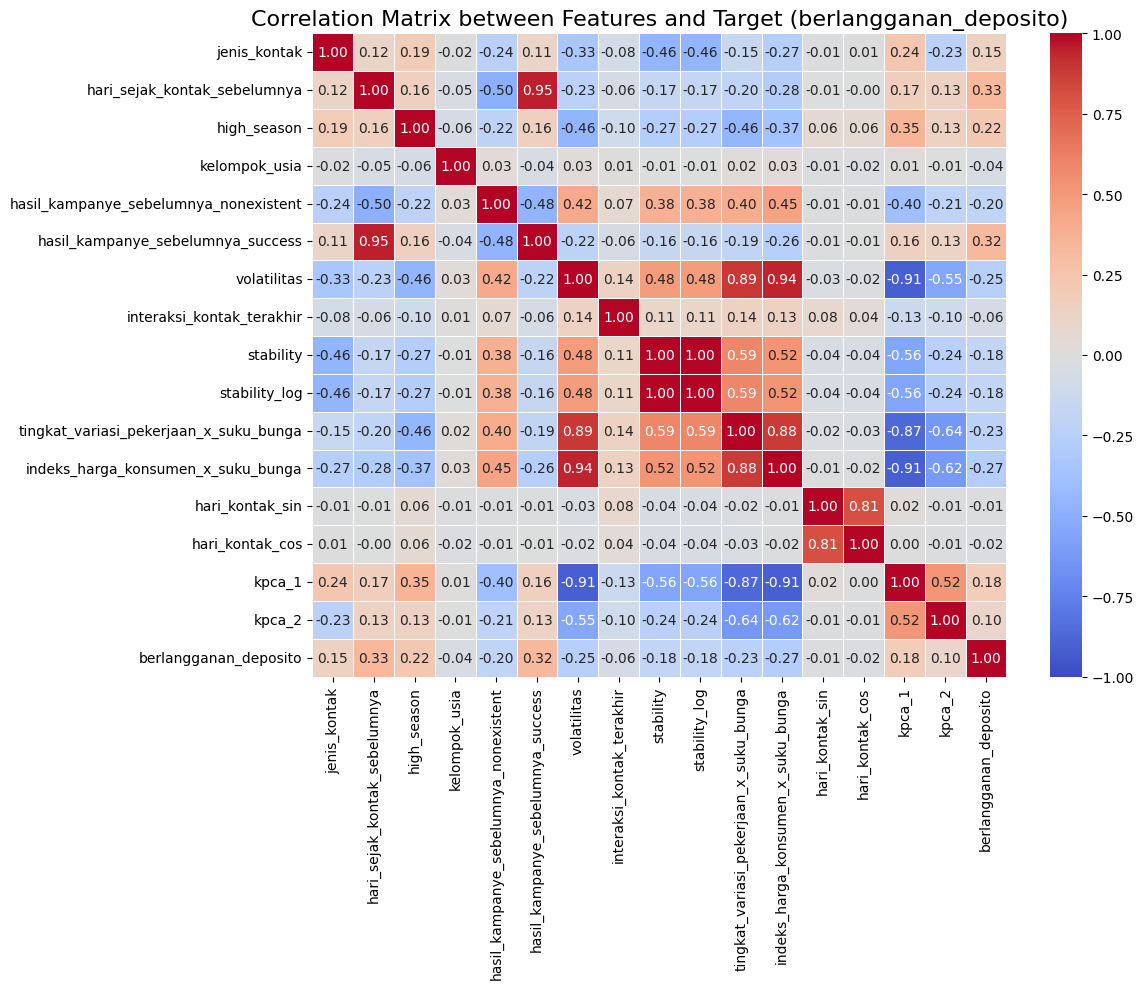

In [1073]:
X_train_with_y = X_train.copy()
X_train_with_y['berlangganan_deposito'] = y_train

corr_matrix = X_train_with_y.corr(method='spearman')

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix between Features and Target (berlangganan_deposito)', fontsize=16)
plt.tight_layout()
plt.show()

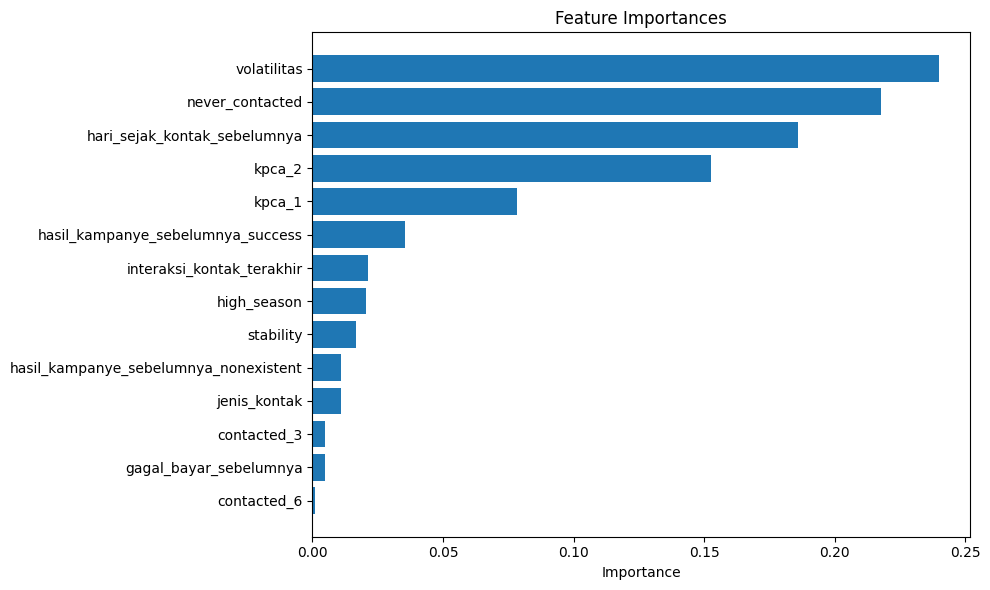

In [920]:
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Visualize the importance
feature_names = X_train.columns
indices = importances.argsort()

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(X_train.shape[1]), importances[indices], align="center")
plt.yticks(range(X_train.shape[1]), feature_names[indices])
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


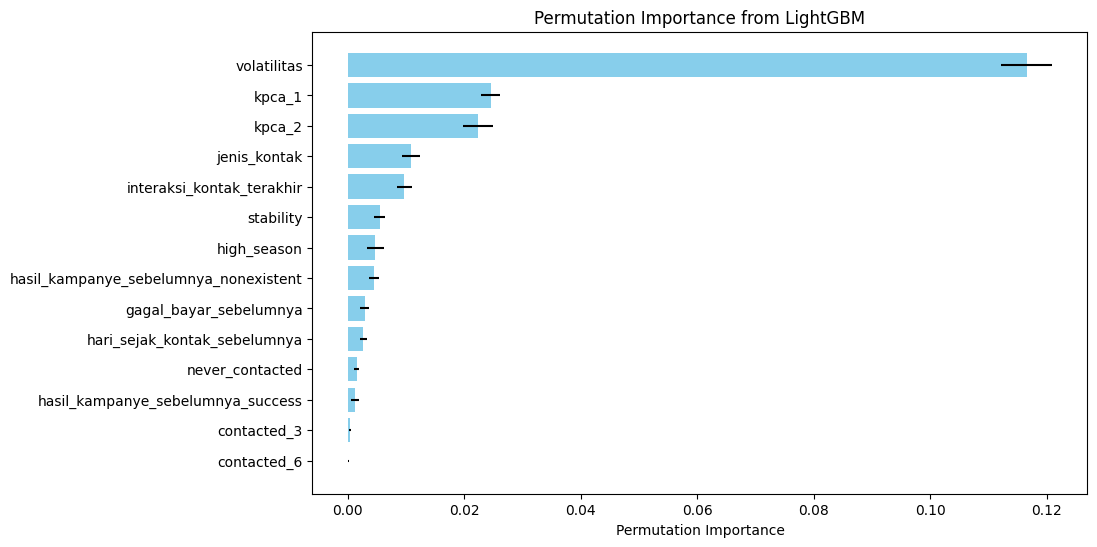

In [ ]:
importances = model.feature_importances_
feature_names = X_train.columns
result = permutation_importance(
    model, 
    X_train, 
    y_train,
    n_repeats=10,
    random_state=42,
    scoring='roc_auc',
)

perm_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance_mean': result.importances_mean,
    'Importance_std': result.importances_std
}).sort_values('Importance_mean', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(perm_importance['Feature'], perm_importance['Importance_mean'], xerr = perm_importance['Importance_std'], color='skyblue')
plt.xlabel('Permutation Importance')
plt.title('Permutation Importance from LightGBM')
plt.gca().invert_yaxis()  
plt.show()

 95%|=================== | 17353/18332 [00:16<00:00]       

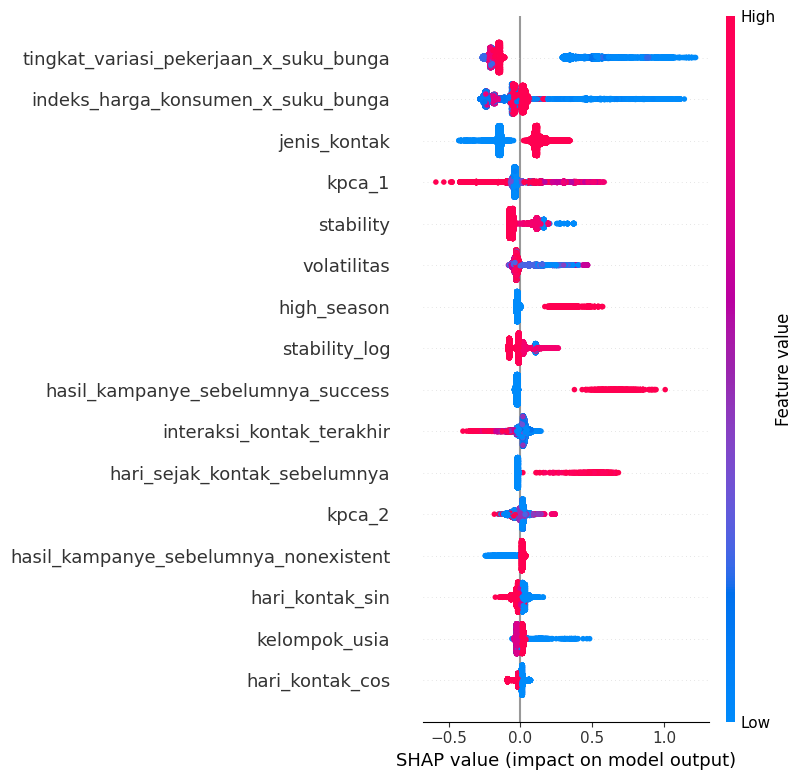

In [1074]:


X_train = train_set.drop(columns=["berlangganan_deposito"])
y_train = train_set["berlangganan_deposito"]
X_test = val_set.drop(columns=["berlangganan_deposito"])
y_test = val_set["berlangganan_deposito"]
# X_train, y_train = CustomPipeline.fit_transform(X_train, y_train)
(X_train, y_train) = CustomPipeline.fit_transform(X_train, y_train)
X_test = CustomPipeline.transform(X_test)

model.fit(X_train, y_train)
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_train, check_additivity=False)

shap.summary_plot(shap_values, X_train)
shap.plots.force(shap_values[0])


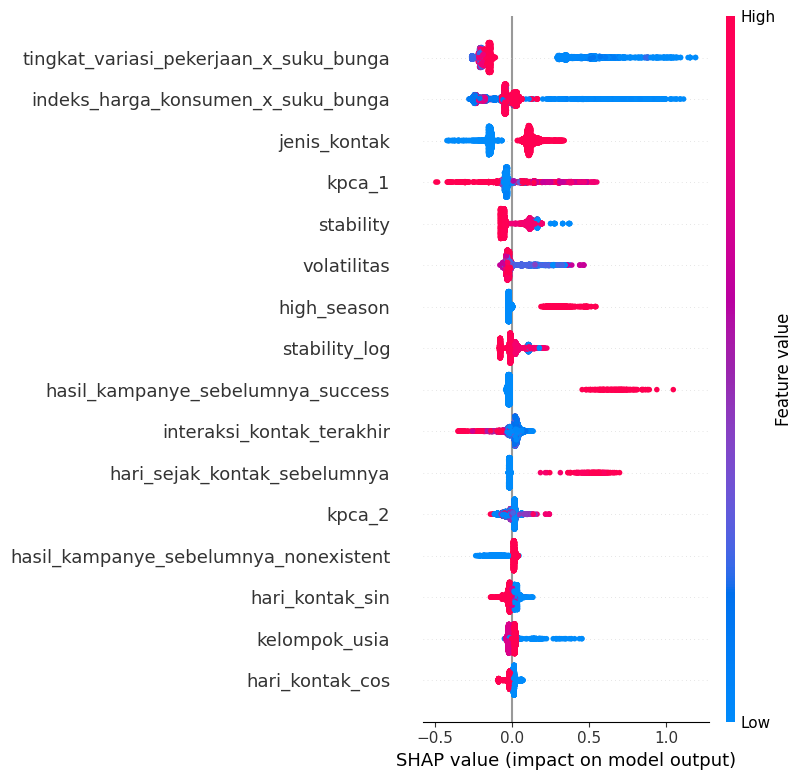

In [1075]:
test_set = CustomPipeline.transform(test_df)
explainer2 = shap.Explainer(model, X_train)
shap_values2 = explainer2(test_set, check_additivity=False)

shap.summary_plot(shap_values2, test_set)
shap.plots.force(shap_values2[0])

# Submission

In [1705]:
X, y = CustomPipeline.fit_transform(train_df.drop(columns=["berlangganan_deposito"]), train_df["berlangganan_deposito"])
id = test_df['customer_number']
test = CustomPipeline.transform(test_df)

In [1706]:

model.fit(X, y)
submission_pred = model.predict_proba(test)[:, 1]

In [1707]:
submission = pd.DataFrame({
    "customer_number": id,
    "berlangganan_deposito": submission_pred
})

submission.to_csv("submission.csv", index=False)

In [1709]:
submission.berlangganan_deposito.describe()

count    5729.000000
mean        0.111630
std         0.142831
min         0.020732
25%         0.043689
50%         0.056745
75%         0.088341
max         0.835944
Name: berlangganan_deposito, dtype: float64